In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Word2vec

In [4]:
from gensim.models import Word2Vec
from gensim.parsing.preprocessing import remove_stopwords
from gensim.utils import simple_preprocess

In [5]:
import nltk
nltk.download('brown')
from nltk.corpus import brown
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
brown_corpus = brown.sents()
brown_corpus

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

In [8]:
# tokenize
def clean(text):
  tokens = remove_stopwords(text)
  tokens = simple_preprocess(tokens)
  return tokens

clean("I am a student.")

['student']

In [14]:
# brown_corpus에 clean 적용해서 전처리된 토큰 리스트 반환하기
bow = [clean(" ".join(sent)) for sent in brown_corpus]
bow

[['the',
  'fulton',
  'county',
  'grand',
  'jury',
  'said',
  'friday',
  'investigation',
  'atlanta',
  'recent',
  'primary',
  'election',
  'produced',
  'evidence',
  'irregularities',
  'took',
  'place'],
 ['the',
  'jury',
  'said',
  'term',
  'end',
  'presentments',
  'city',
  'executive',
  'committee',
  'over',
  'all',
  'charge',
  'election',
  'deserves',
  'praise',
  'thanks',
  'city',
  'atlanta',
  'manner',
  'election',
  'conducted'],
 ['the',
  'september',
  'october',
  'term',
  'jury',
  'charged',
  'fulton',
  'superior',
  'court',
  'judge',
  'durwood',
  'pye',
  'investigate',
  'reports',
  'possible',
  'irregularities',
  'hard',
  'fought',
  'primary',
  'won',
  'mayor',
  'nominate',
  'ivan',
  'allen',
  'jr'],
 ['only',
  'relative',
  'handful',
  'reports',
  'received',
  'jury',
  'said',
  'considering',
  'widespread',
  'election',
  'number',
  'voters',
  'size',
  'city'],
 ['the',
  'jury',
  'said',
  'georgia',
  'regis

In [16]:
model = Word2Vec(bow,
                 size=100,
                 window=5,
                 min_count=2,   # 최소 빈도수
                 workers=10,
                 sg=1   # 0=cbow, 1=skip-gram)
                )

model.init_sims(replace=True)   # 불필요한 메모리 제거

In [21]:
model.wv.most_similar('city')

[('york', 0.9287022352218628),
 ('league', 0.9066806435585022),
 ('chicago', 0.9053071737289429),
 ('kansas', 0.9031456708908081),
 ('club', 0.9013338088989258),
 ('editor', 0.8992515206336975),
 ('pennsylvania', 0.8951699137687683),
 ('central', 0.8874297142028809),
 ('orleans', 0.8845953941345215),
 ('yankees', 0.8809165358543396)]

In [26]:
# king:queen = male:?
# king:male = queen:?

model.wv.most_similar(positive=['king', 'man'], negative=['queen'], topn=3)

[('young', 0.7891360521316528),
 ('son', 0.7830376625061035),
 ('father', 0.7780134677886963)]

In [29]:
# 무관한 단어 선택
model.wv.doesnt_match(['teacher', 'student', 'orange'])

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'orange'

In [32]:
model.wv.similarity('teacher', 'student')

0.90150964

### Plotting

In [ ]:
model.wv['king']

In [36]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-deep")
%matplotlib inline

==Word: king==


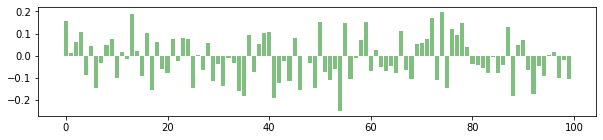

In [41]:
def draw_vector(model:Word2Vec, word):
  vector = model.wv[word]   # 100d np array
  fig, ax = plt.subplots(1, 1, figsize=(10, 2))
  ax.tick_params(axis='both')
  ax.grid(False)
  ax.bar(range(len(vector)), vector, alpha=0.5, color='g')
  print(f"==Word: {word}==")
  plt.show()

draw_vector(model, 'king')

### word representation -> plot
- word (100차원) -> 2차원 평면
- 차원 축소: TSVD, t-SNE

In [66]:
from sklearn.manifold import TSNE
import matplotlib
# matplotlib.rcParams('axes.unicode_minus') = False   # 폰트 깨지는 현상 해결

import pandas as pd

In [ ]:
vocab = model.wv.vocab
vocab

In [ ]:
vector = model.wv[vocab]   # 각 vocab에 대한 벡터
vector

In [58]:
len(vector)

25502

In [59]:
# 개수 줄이기
vocab_size = 500
vocab_show = vocab[:vocab_size]
vector_show = vector[:vocab_size, :]

TypeError: ignored

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


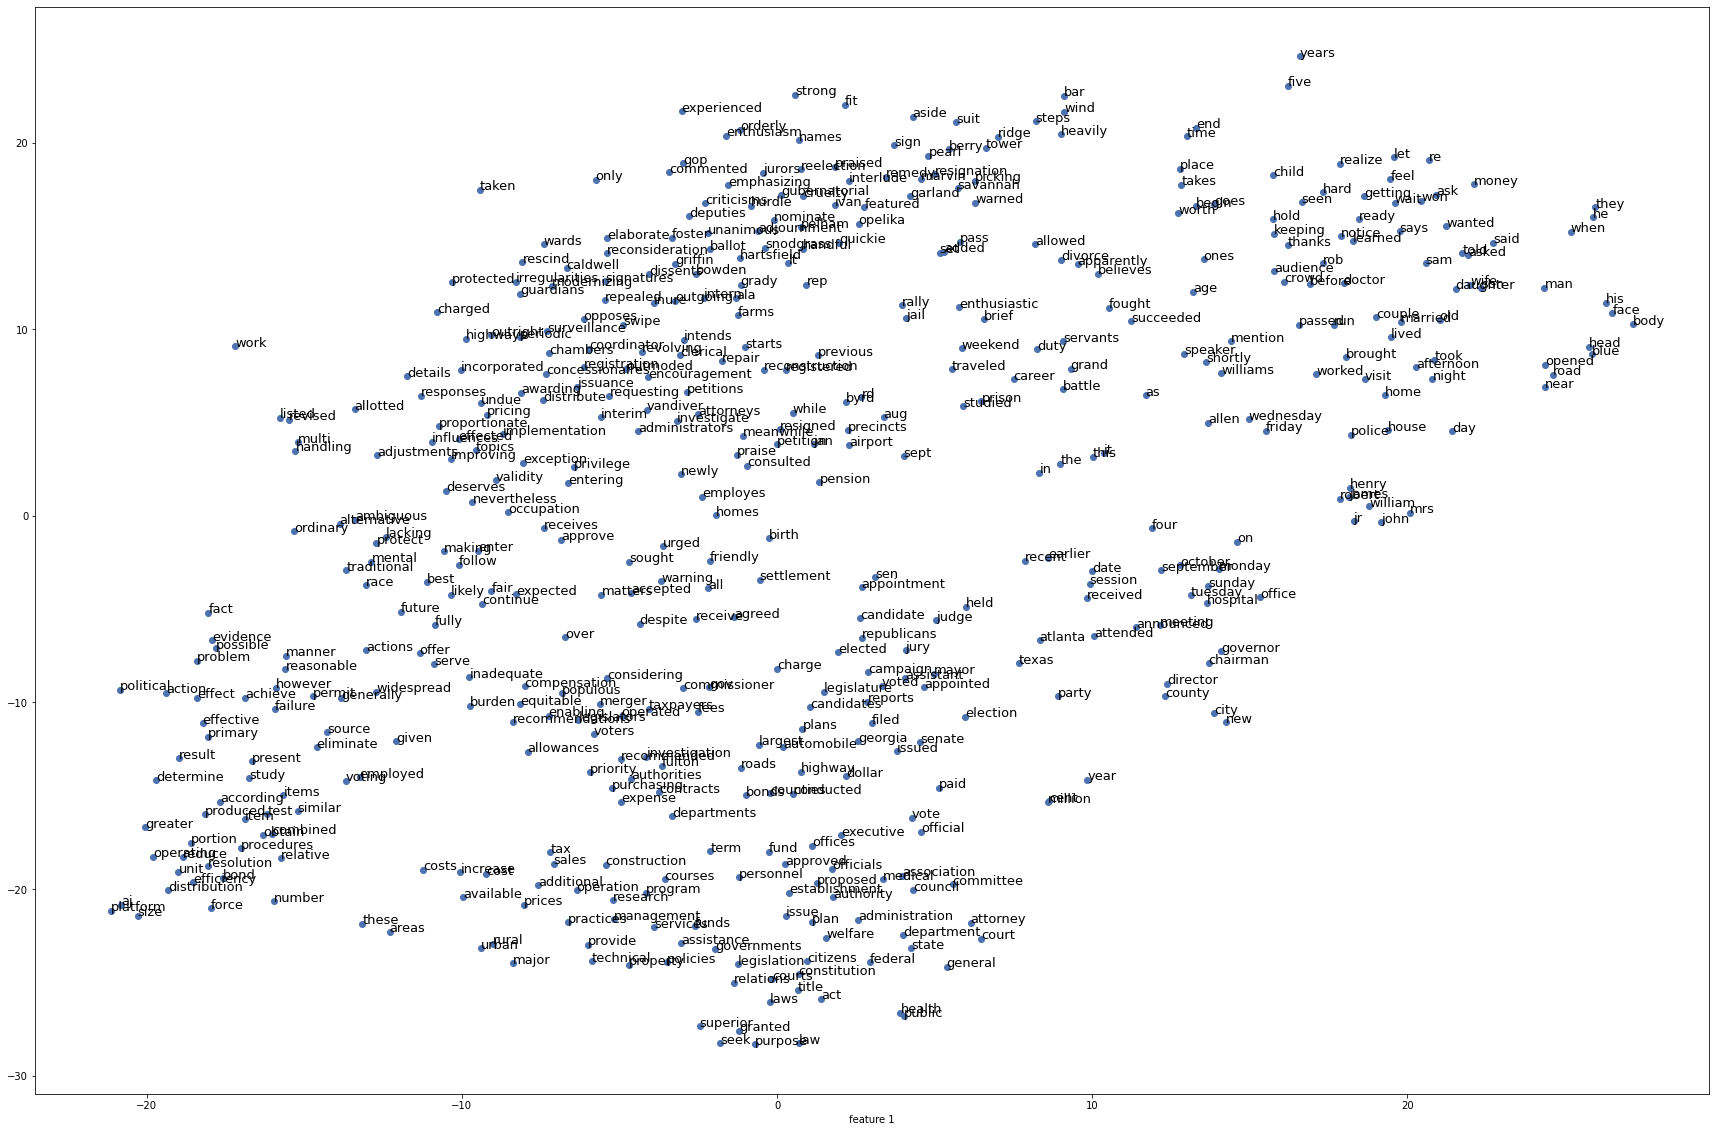

In [69]:
def draw_tsne(model:Word2Vec, vocab_size):
  # vocab size 줄이는 함수가 필요함

  vocab = list(model.wv.vocab)
  vector = model.wv[vocab]
  vocab_size = 500
  vocab_show = vocab[:vocab_size]
  vector_show = vector[:vocab_size, :]

  # 나중에 tsne 대신 tsvd로 해보기
  tsne = TSNE()
  X = tsne.fit_transform(vector_show)

  df = pd.DataFrame(X, index=vocab_show, columns=['x', 'y'])
  
  fig = plt.figure()
  fig.set_size_inches(30, 20)
  ax = fig.add_subplot(1, 1, 1)
  ax.scatter(df.x, df.y)

  # annotation
  for word, vector in df.iterrows():
    ax.annotate(word, vector, fontsize=13)
  
  plt.xlabel("feature 0")
  plt.xlabel("feature 1")
  plt.show()

draw_tsne(model, vocab_size)


In [73]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2021-12-13 07:45:09--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.145.245
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.145.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

gleNews-vectors-neg  30%[=====>              ] 472.25M  34.2MB/s    eta 35s    ^C


In [71]:
file = "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

from gensim.models import KeyedVectors
google = KeyedVectors.load_word2vec_format(file, binary=True, limit=200000)

In [74]:
google.most_similar('king')

[('kings', 0.7138046026229858),
 ('queen', 0.6510956883430481),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204220056533813),
 ('prince', 0.6159993410110474),
 ('sultan', 0.5864822864532471),
 ('ruler', 0.5797567367553711),
 ('princes', 0.5646552443504333),
 ('throne', 0.5422104597091675),
 ('royal', 0.5239794254302979)]

In [78]:
google.most_similar(positive=['king', 'man'], negative=['woman'], topn=3)

[('kings', 0.6490574479103088),
 ('prince', 0.4854173958301544),
 ('crown_prince', 0.4816294312477112)]

In [79]:
len(google['king'])   # 300 차원

300

==Word: king==


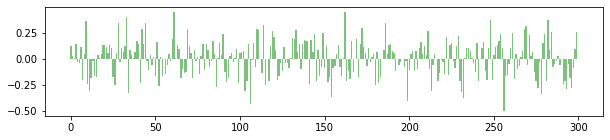

In [81]:
def draw_vector(model, word):
  vector = model[word]   # 100d np array
  fig, ax = plt.subplots(1, 1, figsize=(10, 2))
  ax.tick_params(axis='both')
  ax.grid(False)
  ax.bar(range(len(vector)), vector, alpha=0.5, color='g')
  print(f"==Word: {word}==")
  plt.show()

draw_vector(model=google, word='king')